## We will focus on identifying and dealling with overfitting through 
- Early Stopping Callbcks 

# and 

- Dropout Layers

### Early Stopping 
Automatically stopping training based on a loss condition on the validation data passed during the model.fit() call

## Dropout layers
- Can be added to turn neurons off during training to prevent overfitting.

- Each Layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import the cancer classification data set
df = pd.read_csv('DATA/cancer_classification.csv')

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

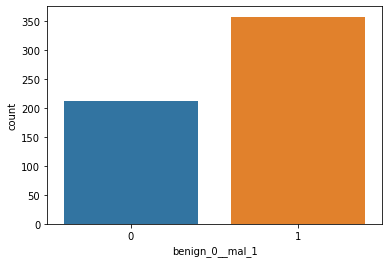

In [8]:
# check the number of instances per label
sns.countplot(x='benign_0__mal_1',data=df)

In [10]:
# Correlation of feaures to malignance
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

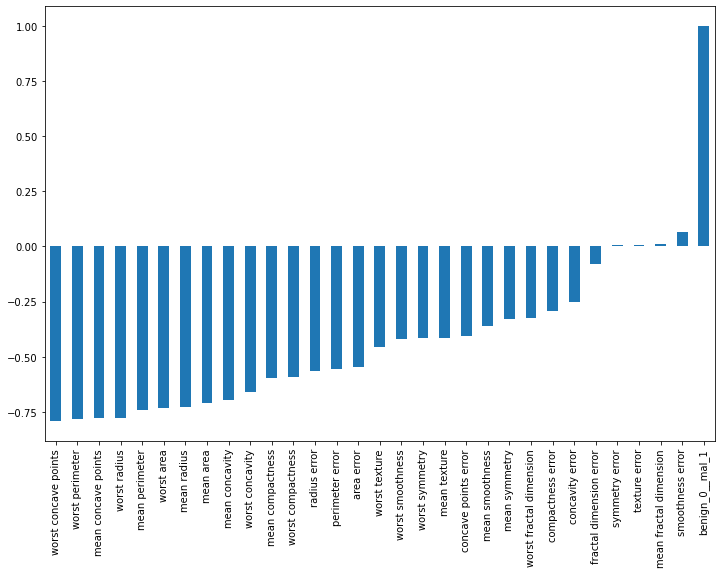

In [12]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

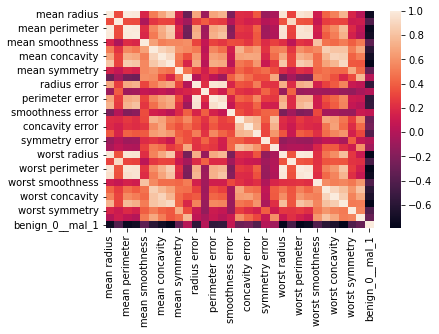

In [13]:
sns.heatmap(df.corr())

In [16]:
# Setup
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values


In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=101)

In [19]:
# import the scaller and scale on the training data
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense,Dropout 

In [27]:
X_train.shape

(426, 30)

In [28]:
# use 30 neurons per layer

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# let's choose a large number of 600 epochs 

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 31ms/step - loss: 0.6841 - val_loss: 0.6580
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6386 - val_loss: 0.6167
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5994 - val_loss: 0.5781
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5575 - val_loss: 0.5306
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5091 - val_loss: 0.4771
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4604 - val_loss: 0.4276
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4122 - val_loss: 0.3770
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3687 - val_loss: 0.3365
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3327 - val_loss: 0.3022
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3018 - val_loss: 0.2733
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0507 - val_loss: 0.1224
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0477 - val_loss: 0.1152
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0527 - val_loss: 0.1356
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0511 - val_loss: 0.1151
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0491 - val_loss: 0.1245
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0507 - val_loss: 0.1188
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0475 - val_loss: 0.1196
Epoch 90/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0481 - val_loss: 0.1282
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0483 - val_loss: 0.1255
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0462 - val_loss: 0.125

14/14 [==============================] - 0s 5ms/step - loss: 0.0347 - val_loss: 0.1413
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0370 - val_loss: 0.1300
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0439 - val_loss: 0.1465
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.1278
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.1418
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.1387
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0370 - val_loss: 0.1415
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0329 - val_loss: 0.1345
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0329 - val_loss: 0.1425
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0328 - val_loss: 0.1364
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.1582
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.1588
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.1521
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.1634
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.1423
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.1617
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.1468
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.1523
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.1542
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.1527
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.1712
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.1796
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.1710
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.2177
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.1606
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0209 - val_loss: 0.1829
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.1780
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.1789
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.1822
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.1853
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.1937
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.2198
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.2053
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.2194
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.2075
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.1902
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.2293
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.1884
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.2245
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.1912
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.2282
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.2329
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.2442
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0095 - val_loss: 0.2466
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.2331
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.2644
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.2251
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.2326
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.2471
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.2490
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.2677
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.2782
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.2939
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.2666
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.3005
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.2623
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.3021
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.2743
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.2312
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.2926
Epoc

In [32]:
# Plot out the loss from the model history
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

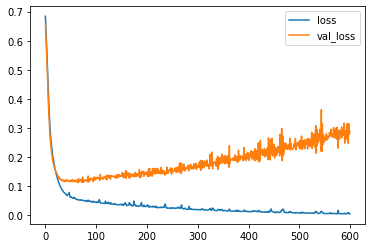

In [33]:
losses.plot()

In [34]:
# we appear to start overfitting the model when  the validation loss begins increasing

In [36]:
# remake the model for training
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping 

In [39]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [44]:
# Stop early based on the minimum of the validation loss
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6496 - val_loss: 0.6336
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6059 - val_loss: 0.5905
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5589 - val_loss: 0.5394
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5081 - val_loss: 0.4870
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4572 - val_loss: 0.4347
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4093 - val_loss: 0.3846
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3655 - val_loss: 0.3433
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3288 - val_loss: 0.3055
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2976 - val_loss: 0.2736
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2704 - val_loss: 0.2501
Epoch 11

<AxesSubplot:>

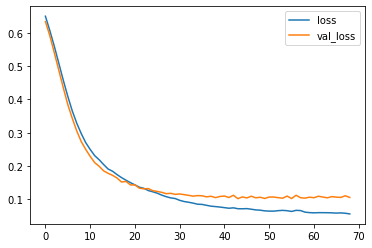

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
# We can also prevent overfitting through use of keras dropout layers

from tensorflow.keras.layers import Dropout

In [49]:
# remake the model for training
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # We set a random selection of half the neurons in this layer to be 

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7086 - val_loss: 0.6777
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6914 - val_loss: 0.6586
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6586 - val_loss: 0.6399
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6395 - val_loss: 0.6231
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.5997
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6040 - val_loss: 0.5695
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5891 - val_loss: 0.5375
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5775 - val_loss: 0.5141
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5423 - val_loss: 0.4867
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4988 - val_loss: 0.4526
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1228 - val_loss: 0.0942
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1120 - val_loss: 0.0867
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1113 - val_loss: 0.1022
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0994 - val_loss: 0.0961
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1349 - val_loss: 0.1050
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1287 - val_loss: 0.0895
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 0.0960
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 0.0963
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1139 - val_loss: 0.1088
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1179 - val_loss: 0.0923
Epoch 93/600


14/14 [==============================] - 0s 6ms/step - loss: 0.0851 - val_loss: 0.0947
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0973 - val_loss: 0.0913
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0766 - val_loss: 0.0910
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0938 - val_loss: 0.0967
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0793 - val_loss: 0.0857
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0997 - val_loss: 0.0990
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0781 - val_loss: 0.0918
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0806 - val_loss: 0.0936
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0740 - val_loss: 0.1024
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0784 - val_loss: 0.0919
Epoc

<AxesSubplot:>

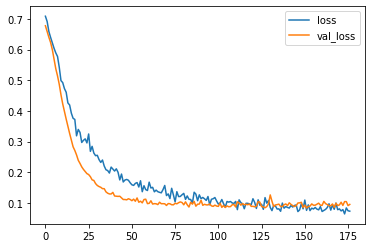

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# The model fits even better

In [54]:
(model.predict(X_test)>0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [55]:
predictions = (model.predict(X_test)>0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[54  1]
 [ 2 86]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

